In [114]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import os
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from tqdm import tqdm
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
data_dir = 'D:\zzStudies\CSE499\BSL\Dataset\Bangla Dataset 04'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

image_size = 32*32

['test', 'train']
['ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঔ', 'ক', 'ক্ষ', 'খ', 'গ', 'ঘ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৎ', 'ড়', 'ঢ়', 'য়']


In [116]:
transform = tt.Compose(
    [
        tt.Resize(32),
        tt.ToTensor(),
        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
dataset = ImageFolder(data_dir+"/train", transform)

In [117]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.2078, 0.2157, 0.2235,  ..., 0.3490, 0.3569, 0.3647],
         [0.2392, 0.2549, 0.2549,  ..., 0.3569, 0.3569, 0.3569],
         [0.2549, 0.2627, 0.2627,  ..., 0.3569, 0.3569, 0.3569],
         ...,
         [0.2235, 0.2314, 0.2392,  ..., 0.4039, 0.4039, 0.4118],
         [0.1765, 0.1843, 0.1922,  ..., 0.3725, 0.3804, 0.3882],
         [0.0902, 0.0980, 0.1059,  ..., 0.3255, 0.3412, 0.3490]],

        [[0.2000, 0.2157, 0.2157,  ..., 0.3412, 0.3412, 0.3412],
         [0.2392, 0.2471, 0.2471,  ..., 0.3490, 0.3490, 0.3490],
         [0.2471, 0.2549, 0.2549,  ..., 0.3490, 0.3490, 0.3490],
         ...,
         [0.1922, 0.2078, 0.2157,  ..., 0.3961, 0.3961, 0.4039],
         [0.1373, 0.1451, 0.1529,  ..., 0.3647, 0.3725, 0.3804],
         [0.0431, 0.0588, 0.0667,  ..., 0.3255, 0.3333, 0.3490]],

        [[0.1922, 0.2000, 0.2000,  ..., 0.3098, 0.3098, 0.3176],
         [0.2235, 0.2314, 0.2314,  ..., 0.3176, 0.3176, 0.3176],
         [0.2314, 0.2392, 0.2392,  ..., 0.3176, 0.3176, 0.

In [118]:
print(dataset.classes)

['ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঔ', 'ক', 'ক্ষ', 'খ', 'গ', 'ঘ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৎ', 'ড়', 'ঢ়', 'য়']


In [119]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow((img.permute(1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  ঁ (0)


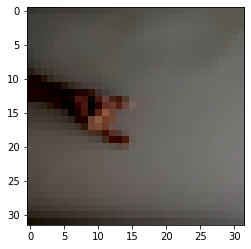

In [120]:
show_example(*dataset[0])

In [130]:
random_seed = 16
torch.manual_seed(random_seed);
print(len(dataset))

270


In [131]:
val_size = 20
test_size = 40
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

print(len(train_ds), len(val_ds), len(test_ds))

210 20 40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  ঁ (0)


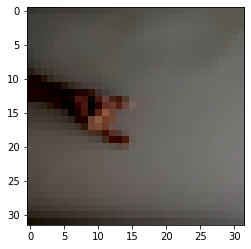

In [132]:
show_example(*dataset[0])

In [133]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [125]:
device = get_default_device()
device

device(type='cuda')

In [134]:
batch_size=32

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

In [135]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [136]:
show_batch(train_dl)

RuntimeError: DataLoader worker (pid(s) 18552, 952, 13404, 17640) exited unexpectedly

In [77]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [78]:

class ASLDeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size , 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )
        
    def forward(self, xb):
        return self.network(xb.view(xb.size(0), -1))

    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}    
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [79]:

input_size = 3*32*32
output_size = 29
DNN = ASLDeepNeuralNetwork(input_size, output_size)


In [80]:
# DNN

In [81]:

train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
to_device(DNN, device);


RuntimeError: CUDA error: device-side assert triggered

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:

img, label = val_ds[0]
print(img.shape)
# evaluate(DNN, val_dl)


In [ ]:

num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001


In [ ]:
# history = fit(num_epochs, lr, DNN, train_dl, val_dl, opt_func)

In [ ]:
# evaluate(DNN, test_dl)

In [ ]:

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');


In [ ]:
# plot_accuracies(history)

In [ ]:
# plot_losses(history)

In [ ]:
# torch.save(DNN.state_dict(), 'DNN.pth')

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
class ASLModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 16 x 16
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 8 x 8
            
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 512 x 4 x 4
            
            nn.Flatten(), 
            nn.Linear(512*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 29))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = ASLModel()
to_device(model, device);
model

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ASLModel(), device)

In [57]:
evaluate(model, val_dl)

RuntimeError: CUDA error: device-side assert triggered

In [37]:
num_epochs = 12
opt_func = torch.optim.Adam
lr = 0.0001

In [38]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [0], val_loss: 0.3327, val_acc: 0.8837


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [1], val_loss: 0.1340, val_acc: 0.9556


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [2], val_loss: 0.0674, val_acc: 0.9785


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [3], val_loss: 0.0305, val_acc: 0.9891


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [4], val_loss: 0.0227, val_acc: 0.9921


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [5], val_loss: 0.0753, val_acc: 0.9754


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [6], val_loss: 0.0359, val_acc: 0.9894


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [7], val_loss: 0.0562, val_acc: 0.9850


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [8], val_loss: 0.0138, val_acc: 0.9955


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [9], val_loss: 0.0116, val_acc: 0.9972


  0%|                                                                                         | 0/1032 [00:00<?, ?it/s]

Epoch [10], val_loss: 0.0225, val_acc: 0.9937


100%|██████████████████████████████████████████████████████████████████████████████| 1032/1032 [00:41<00:00, 24.82it/s]


Epoch [11], val_loss: 0.0128, val_acc: 0.9962


In [39]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

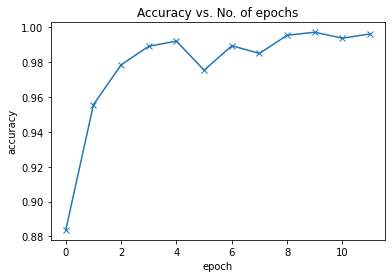

In [40]:
plot_accuracies(history)

In [41]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

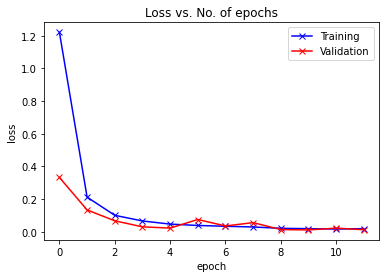

In [42]:
plot_losses(history)

In [43]:
evaluate(model, test_dl)

{'val_loss': 0.010311214253306389, 'val_acc': 0.9976562261581421}

In [52]:
torch.save(model.state_dict(), 'BSL CNN 1.pth')

In [53]:
torch.save(model.state_dict(), 'BSL CNN 1.h5')

In [54]:
def predict_single(input, target, model):
    predictions = model(input)
    _, preds = torch.max(predictions, dim=1)
    
    print("Target:", target)
    print("Prediction:", preds)
    print("Predicted Label:", dataset.classes[preds[0]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  W (tensor(22))
Target: tensor(22, device='cuda:0')
Prediction: tensor([22], device='cuda:0')
Predicted Label: W


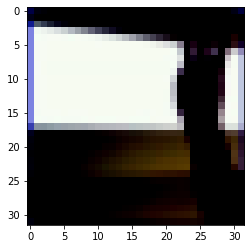

In [46]:
for input, label in test_dl:
    show_example(input[0].cpu(), label[0].cpu())
    predict_single(input[0].view(1, 3, 32, 32), label[0], model)
    break